# Upload Data and understanding the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading File
df= pd.read_csv("/content/sample_data/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Converting exports,health,imports in actual values as its given as %age of the GDP per capita
features_std =['exports','health','imports']
for i in features_std:
    df[i]=(df[i]*df['gdpp'])/100

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [ ]:
df.shape

(167, 10)

In [ ]:
# Column Type in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# continuous variables
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


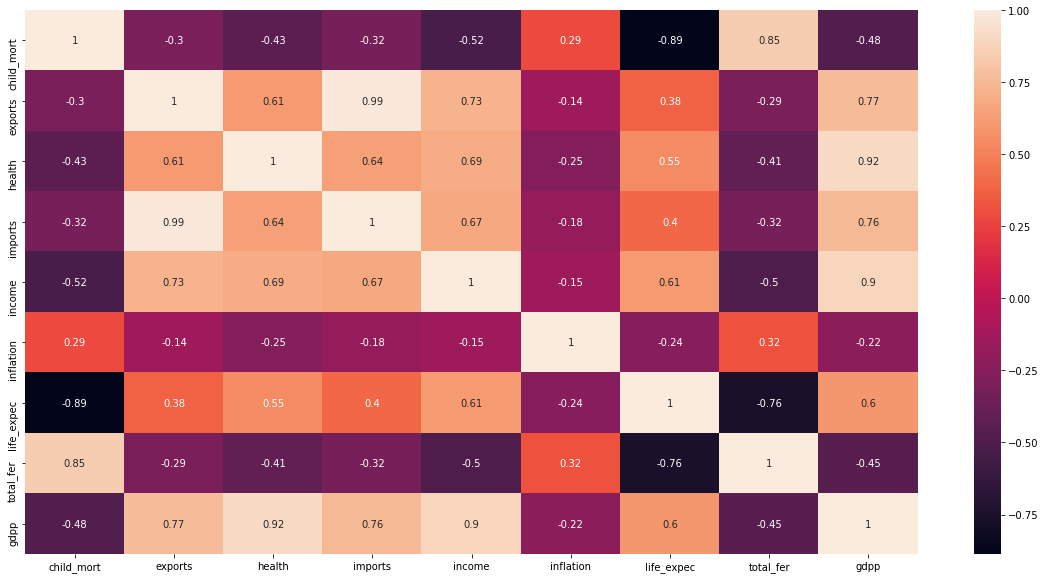

In [ ]:
#correlation using heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)

# Data Visualisation

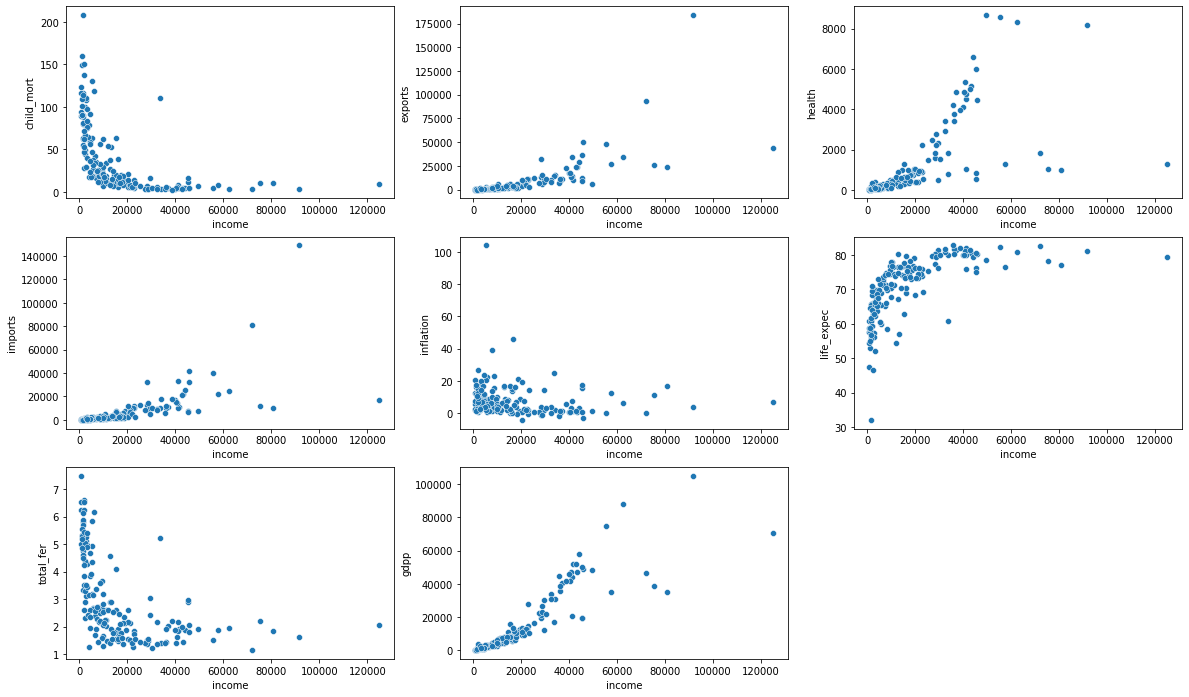

In [ ]:
# distribution wrt income
features = ['child_mort','exports','health','imports','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='income',y=df[i[1]], data=df)

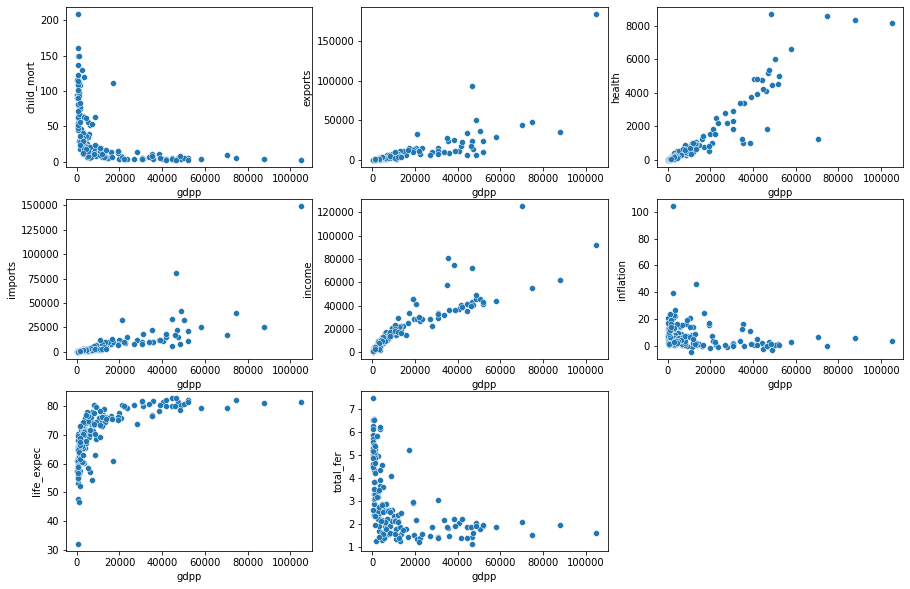

In [ ]:
#distribution wrt gdpp
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer']
plt.figure(figsize = (15,10))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='gdpp',y=df[i[1]], data=df)

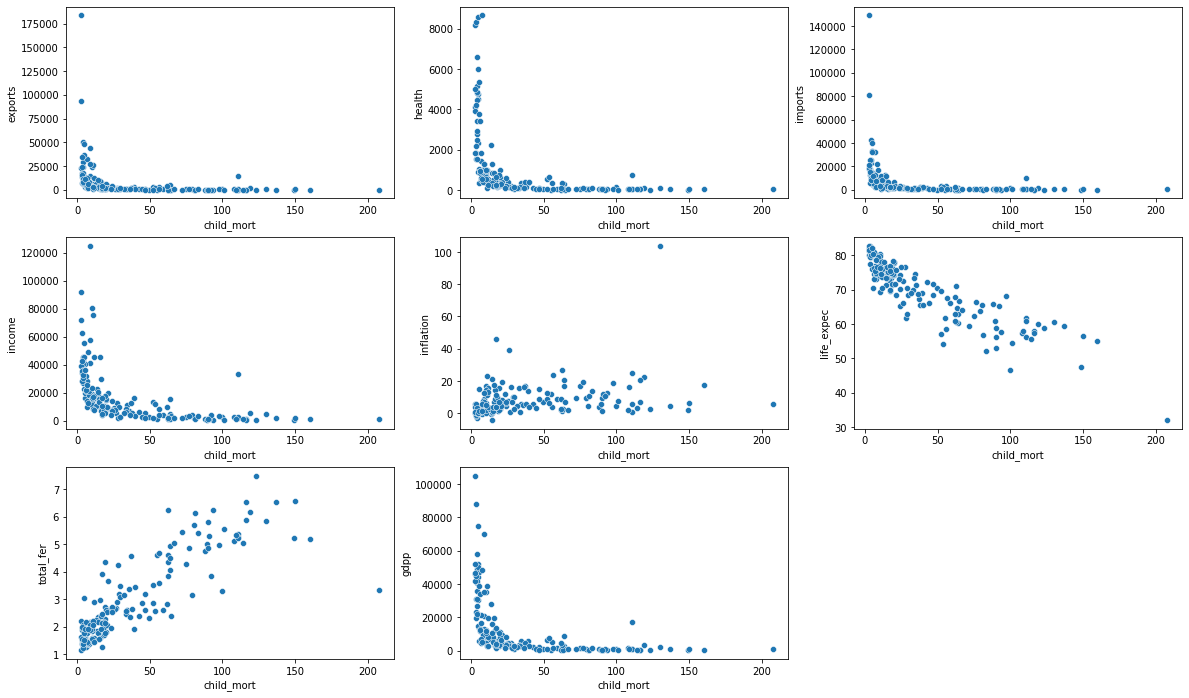

In [ ]:
# Distribution wrt child mortality
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='child_mort',y=df[i[1]], data=df)

# Outlier Analysis

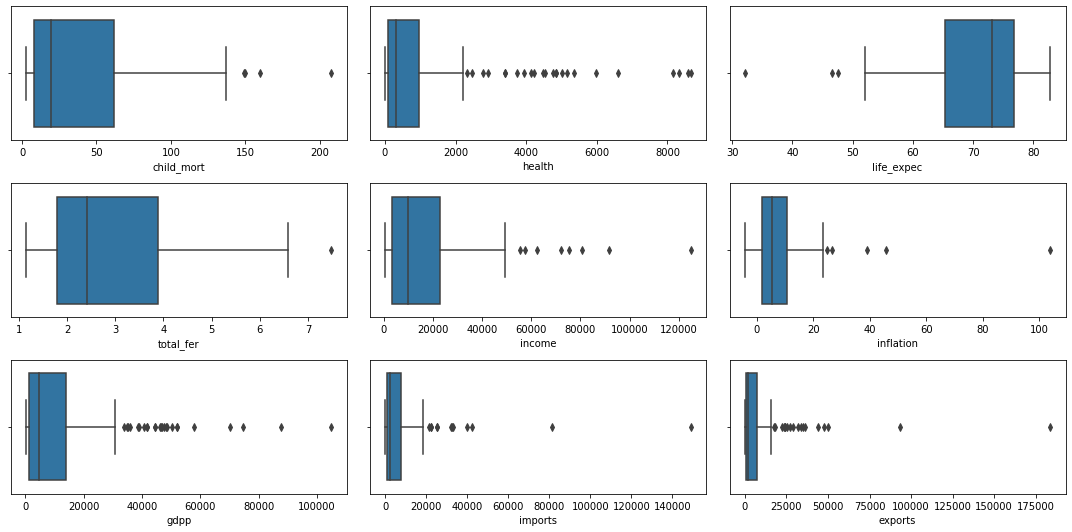

In [ ]:
# Checking the outlier
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])
plt.tight_layout()

In [ ]:
# Removing the outliers
# Caping child_mort lower outliers and keeping Higher as it will be helpful in clustering more child_mort means country is in need of help
q1 = df['child_mort'].quantile(0.01)
df['child_mort'][df['child_mort']<= q1] = q1

# Caping highier outlier for other variables
q3_exports = df['exports'].quantile(0.99)
df['exports'][df['exports']>= q3_exports] = q3_exports

q3_imports = df['imports'].quantile(0.99)
df['imports'][df['imports']>= q3_imports] = q3_imports

q3_health = df['health'].quantile(0.99)
df['health'][df['health']>= q3_health] = q3_health

q3_gdpp = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp']>= q3_gdpp] = q3_gdpp

q3_life_expec = df['life_expec'].quantile(0.99)
df['life_expec'][df['life_expec']>= q3_life_expec] = q3_life_expec

q3_income = df['income'].quantile(0.99)
df['income'][df['income']>= q3_income] = q3_income

q3_inflation = df['inflation'].quantile(0.99)
df['inflation'][df['inflation']>= q3_inflation] = q3_inflation

q3_total_fer = df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer']>= q3_total_fer] = q3_total_fer

In [ ]:
# Checking data after removal of outlier
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.942259,12756.826347
std,40.327869,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.498340,17430.208938
min,2.800000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


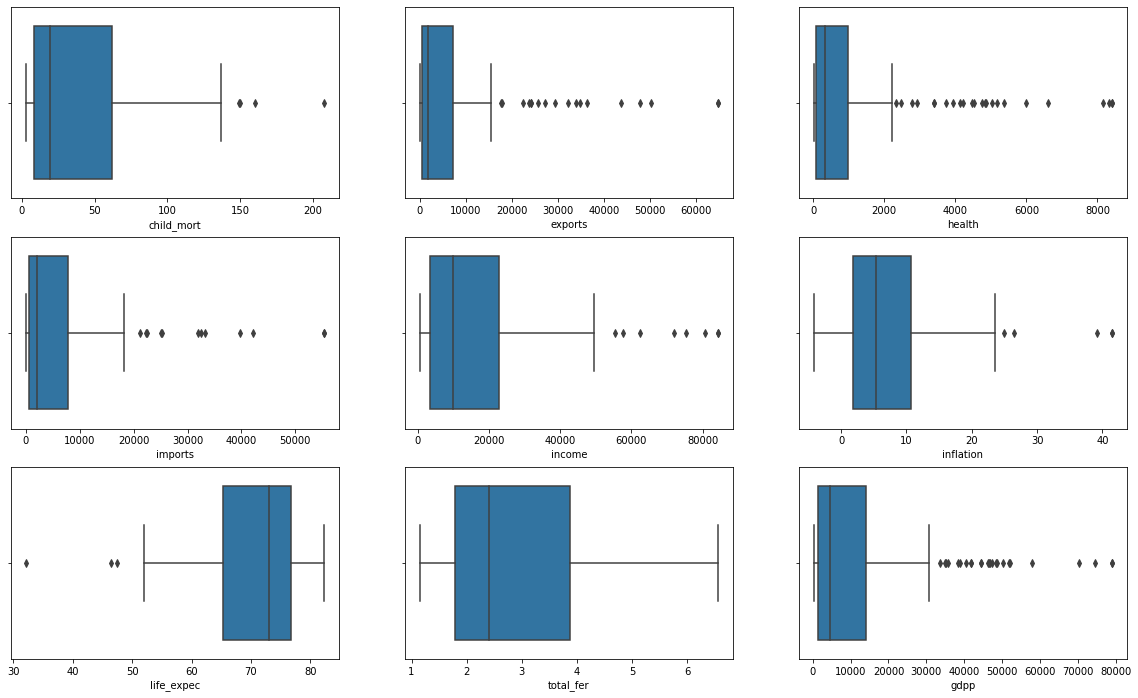

In [ ]:
# Visualising univatriate after outlier removal
features = df.columns[1:]
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

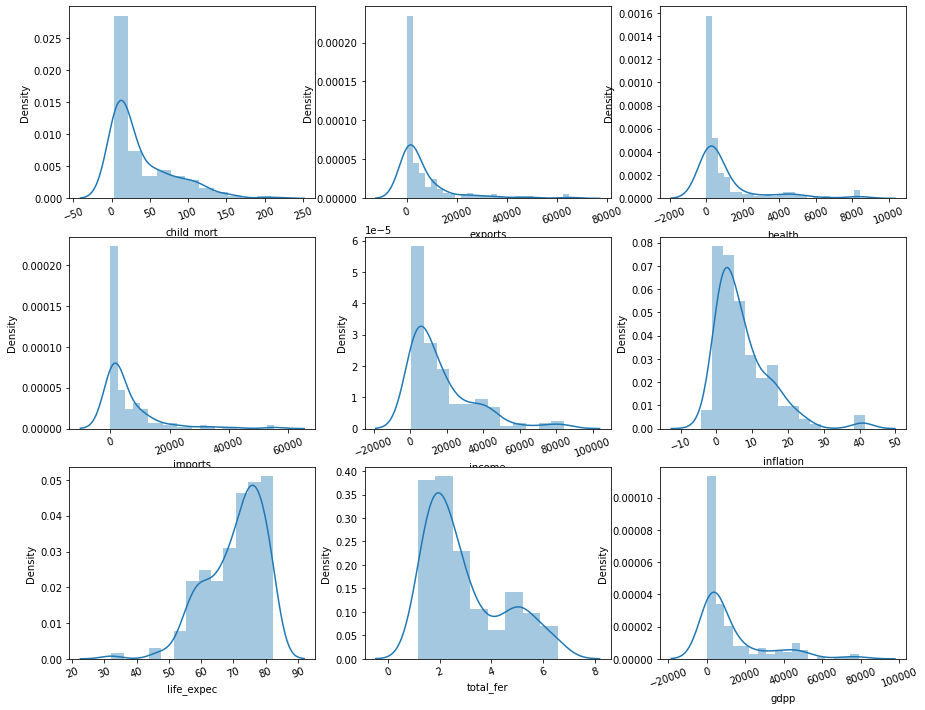

In [ ]:
#Visualising using pair plot
plt.figure(figsize=(15, 12))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation=20)


# K Mean Clustering


In [ ]:
#Scaling using MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1= df.drop('country', axis=1)
df1 = scaler.fit_transform(df1)

In [ ]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.425926,0.000837,0.003465,0.004473,0.011950,0.298766,0.479411,0.862642,0.004083
1,0.067251,0.017658,0.030375,0.035887,0.111276,0.190422,0.879252,0.092360,0.048937
2,0.119396,0.026416,0.020620,0.025280,0.146732,0.444537,0.883231,0.321413,0.053629
3,0.566277,0.033925,0.010454,0.027338,0.063165,0.582429,0.556992,0.925447,0.041835
4,0.036550,0.085656,0.086078,0.129764,0.220749,0.123665,0.889198,0.181026,0.151781


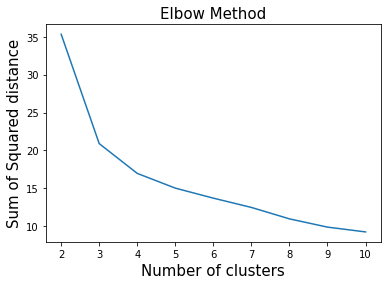

In [ ]:
# Elbow Curve
from sklearn.cluster import KMeans
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
 
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [ ]:
# K=3 taking 3 cluster
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [ ]:
kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [ ]:
df.kmean = df.copy()

In [ ]:
df.kmean = pd.concat([df.kmean, label ], axis =1)

In [ ]:
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [ ]:
# Datapoints we have in each cluster
df.kmean.label.value_counts()

0    92
1    46
2    29
Name: label, dtype: int64

In [ ]:
df.kmean.shape

(167, 11)

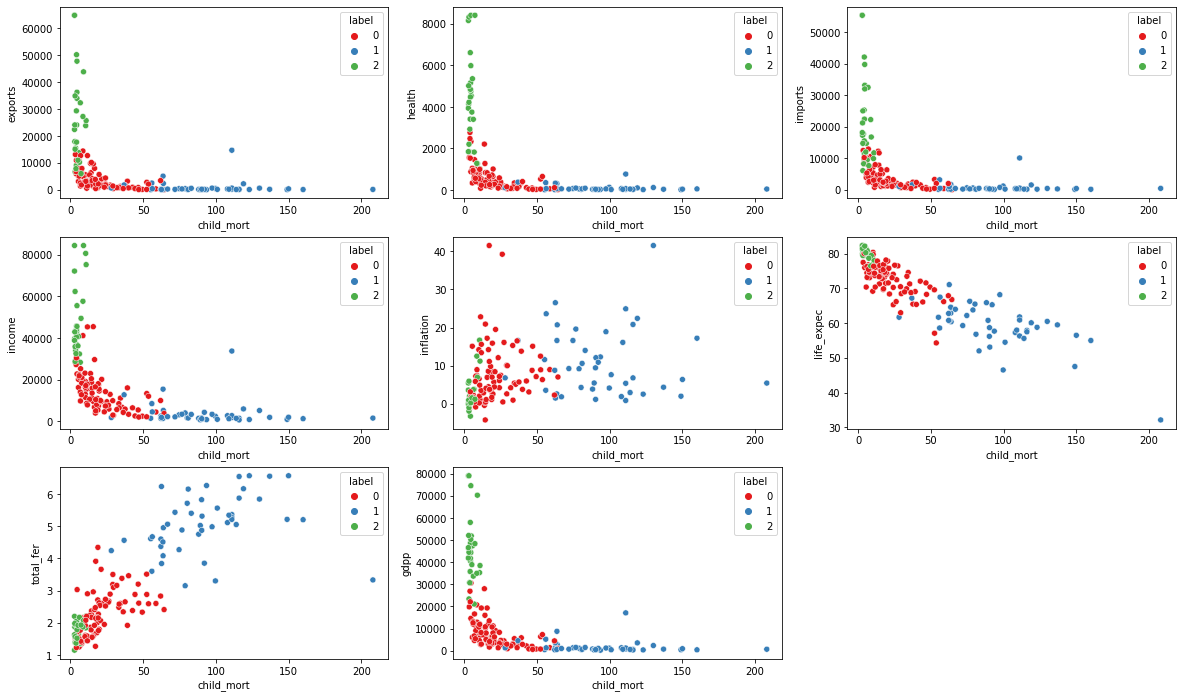

In [ ]:
#Cluster visualisation for Child Mortality
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='child_mort',y=df[i[1]], hue = 'label', data = df.kmean, palette = 'Set1')

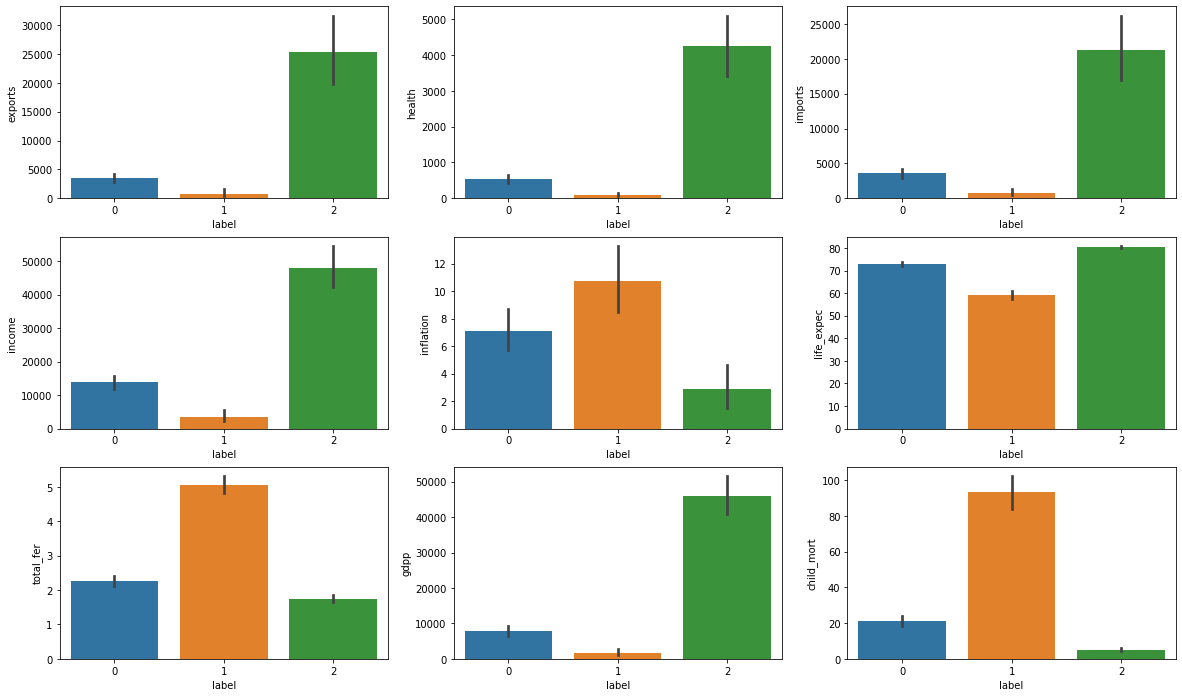

In [ ]:
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp','child_mort']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x='label', y=df[i[1]], data=df.kmean)

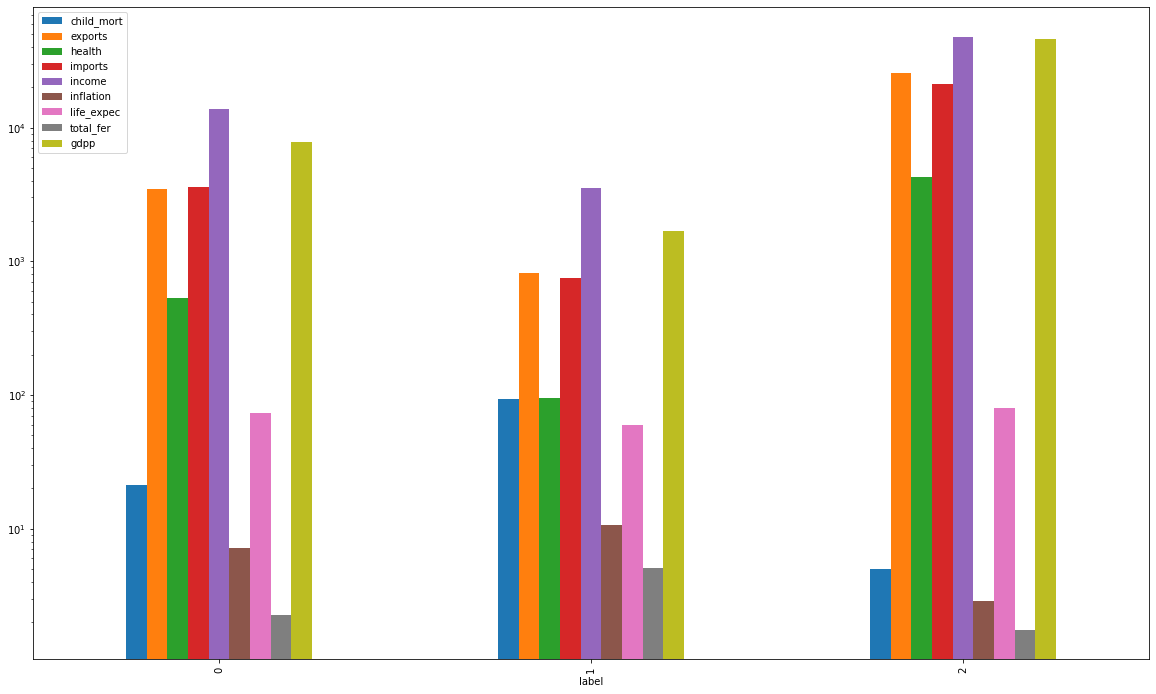

In [ ]:
df.kmean.drop(['country'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.yscale('log')
plt.show()

# Hierarchical Clustering

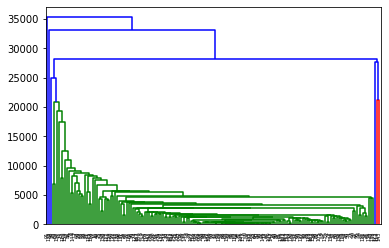

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
df1=df.drop('country',axis=1)
#method as single
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

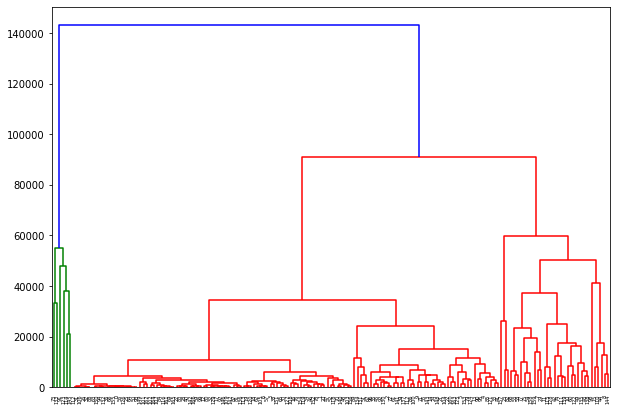

In [ ]:
# method as complete
plt.figure(figsize= (10,7))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
X=df.iloc[:, [1,2]].values

In [ ]:

# Fitting the hierarchical clustering to the mall dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(X)
# Visualising the clusters

In [ ]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df.hier = df.copy()

In [ ]:
df.hier['label'] = cluster_labels
df.hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [ ]:
# number of datapoints in each cluster
df.hier.label.value_counts()

0    128
1     33
2      6
Name: label, dtype: int64

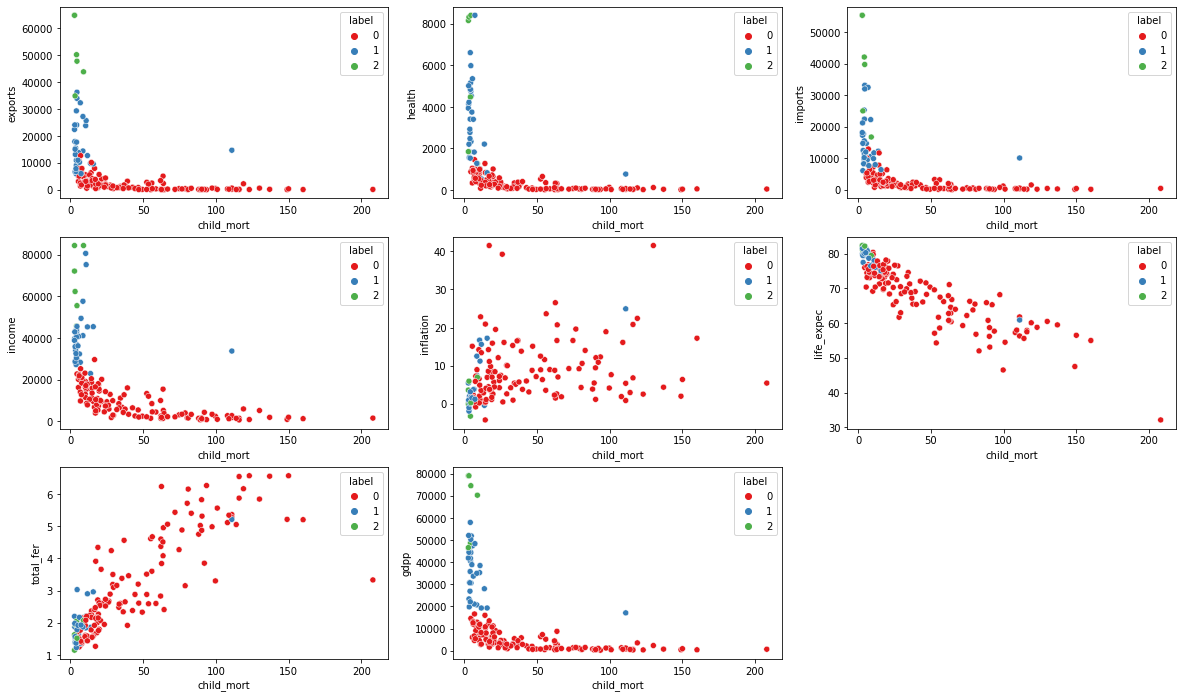

In [ ]:
#visualisation of clusters based on child mortality
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='child_mort',y=df[i[1]], hue = 'label', data = df.hier, palette = 'Set1')

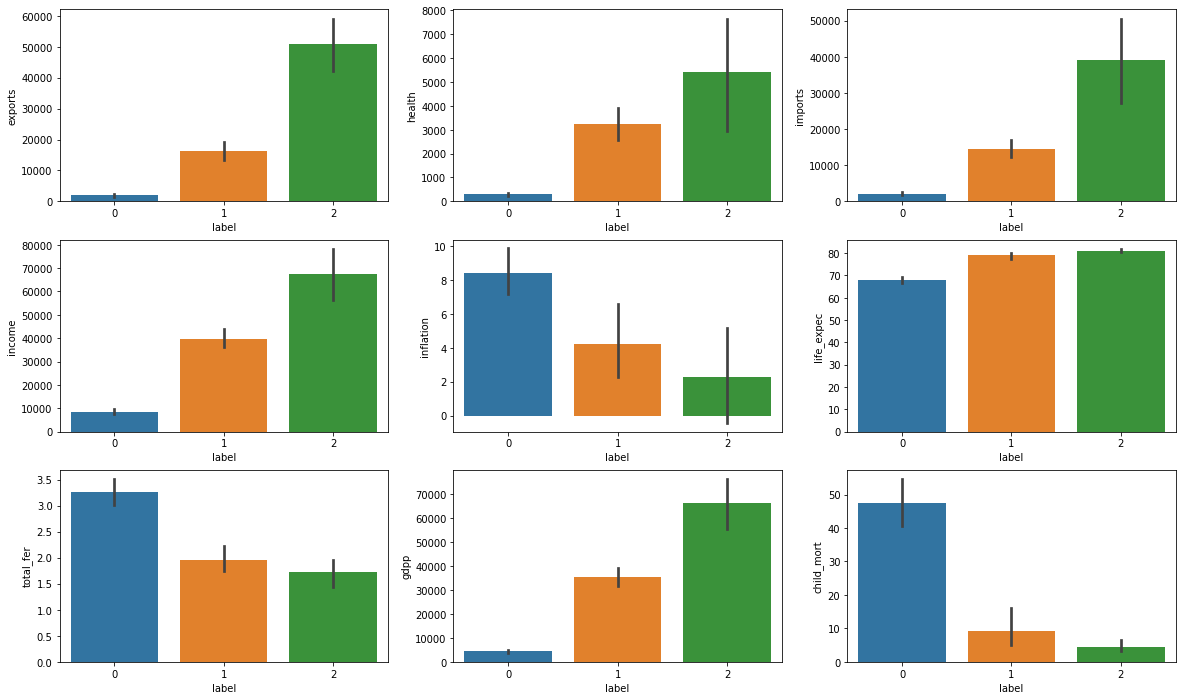

In [ ]:
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp','child_mort']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x='label', y=df[i[1]], data=df.hier)

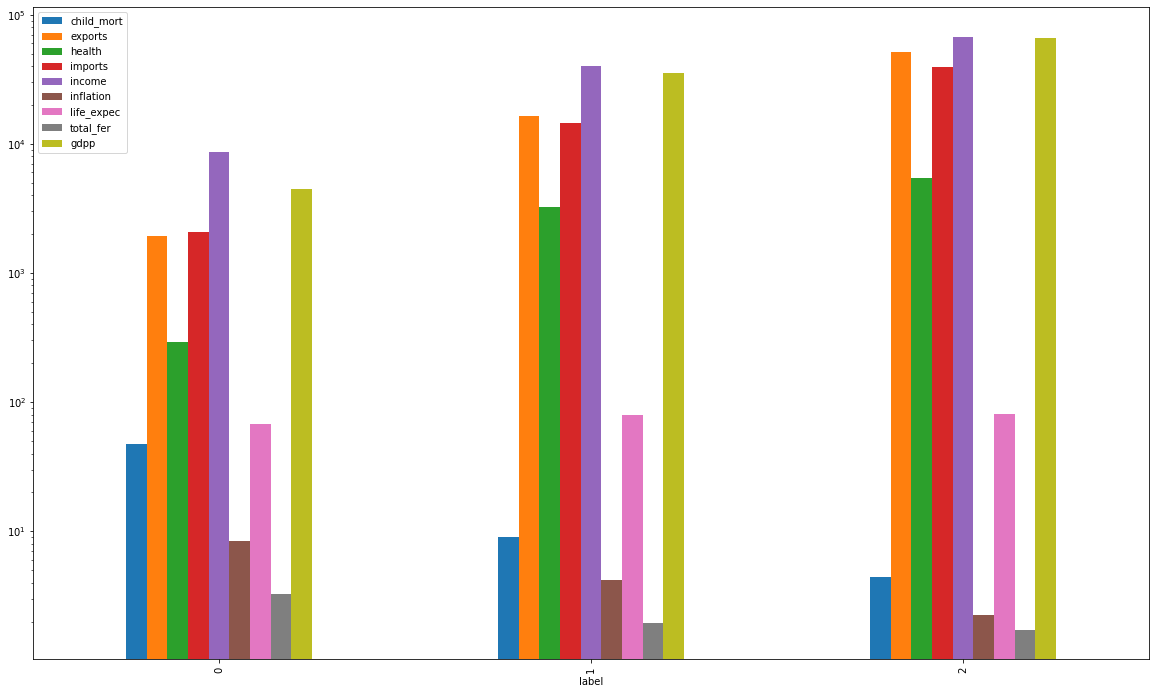

In [ ]:
df.hier.drop(['country'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.yscale('log')
plt.show()

In [ ]:
df['cluster_labels'] = cluster_labels
cluster_0_hc = df[['cluster_labels','country', 'child_mort', 'gdpp', 'income' ]].loc[df['cluster_labels'] == 0].reset_index()
cluster_0_hc.shape

(128, 6)

In [ ]:
cluster_0_hc.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head(5)

,index,cluster_labels,country,child_mort,gdpp,income
51,66,0,Haiti,208.0,662.0,1500.0
102,132,0,Sierra Leone,160.0,399.0,1220.0
25,32,0,Chad,150.0,897.0,1930.0
24,31,0,Central African Republic,149.0,446.0,888.0
75,97,0,Mali,137.0,708.0,1870.0
